# Prediction of Body Fat Percentage 

*Xiaoxiang Hua, xhua24@wisc.edu*  
*YiJie Liu, liu854@wisc.edu*  
*Bi Qing Teng, bteng2@wisc.edu*    

*October 7, 2019*

## Background

Various methods have been used to measure one's health and fitness including waist-to-height ratio, body fat percentage, skin-fold measurements using a caliper, body mass index (BMI) and etc.

According to the American Council on Exercise, the percentage of body fat of a normal adult male typically ranges from 18% to 24%. The percentage of body fat can be estimated using the Siri's equation

$$Percent Body Fat = \frac{495}{D}-450$$

where D is the body density which can be accurately measured using underwater hydrostatic weighing procedures. Although this method gives an accurate measurement of the body fat percentage, it is both cumbersome and difficult to measure. 

To overcome this issue, there are several body fat calculators available online. One calculator that uses the U.S. Navy fitness formula requires information such as one's gender, age, weight, height, waist, hip and neck circumferences in estimating the percentage of body fat. Another calculator requires information about gender, weight, the circumferences of waist, wrist, hip and forearm as input. In both calculators, the three measurements weight, waist and hip are used in predicting the percentage of body fat which we flagged as possible crucial variables prior to model-fitting.

## Aim

This project aims to study the relationship between body fat percentage and the clinically available measurements and then come up with a simple, robust, accurate and precise "rule-of-thumb" to predict percentage of body fat from a subset of predictors. 

## Data Preparation

The data set **bodyfat.csv** contains 252 observations and 17 variables with no missing data. In particular, the variables are **idno**, **body fat percentage** (%), **body density** (gm/cm$^3$), **age** (years), **weight** (lbs), **height** (inches), **adiposity** (bmi), **neck**, **chest**, **abdomen**, **hip**, **thigh**, **knee, ankle, biceps, forearm** and **wrist** circumferences measured in cm. The weight and height variables were measured to the nearest quarter pound and inch respectively while other variables were measured to the nearest tenth of a centimeter.

In [1]:
rm(list=ls())

# import data
bodyfat_original = read.csv("data/bodyfat.csv",sep = ",", header = TRUE)
colnames(bodyfat_original) = tolower(variable.names(bodyfat_original))

# remove idno variable
bodyfat_original = bodyfat_original[,-1]

# print first and last few observations 
head(bodyfat_original)
tail(bodyfat_original)

# summary of data
summary(bodyfat_original)

bodyfat,density,age,weight,height,adiposity,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
20.6,1.0502,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


,bodyfat,density,age,weight,height,adiposity,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
247,29.1,1.0308,69,215.50,70.50,30.5,40.8,113.7,107.6,110.0,63.3,44.0,22.6,37.5,32.6,18.8
248,11.5,1.0736,70,134.25,67.00,21.1,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
249,32.3,1.0236,72,201.00,69.75,29.1,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
250,28.3,1.0328,72,186.75,66.00,30.2,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
251,25.3,1.0399,72,190.75,70.50,27.0,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8
252,30.7,1.0271,74,207.50,70.00,29.8,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9


    bodyfat         density           age            weight     
 Min.   : 0.00   Min.   :0.995   Min.   :22.00   Min.   :118.5  
 1st Qu.:12.80   1st Qu.:1.041   1st Qu.:35.75   1st Qu.:159.0  
 Median :19.00   Median :1.055   Median :43.00   Median :176.5  
 Mean   :18.94   Mean   :1.056   Mean   :44.88   Mean   :178.9  
 3rd Qu.:24.60   3rd Qu.:1.070   3rd Qu.:54.00   3rd Qu.:197.0  
 Max.   :45.10   Max.   :1.109   Max.   :81.00   Max.   :363.1  
     height        adiposity          neck           chest       
 Min.   :29.50   Min.   :18.10   Min.   :31.10   Min.   : 79.30  
 1st Qu.:68.25   1st Qu.:23.10   1st Qu.:36.40   1st Qu.: 94.35  
 Median :70.00   Median :25.05   Median :38.00   Median : 99.65  
 Mean   :70.15   Mean   :25.44   Mean   :37.99   Mean   :100.82  
 3rd Qu.:72.25   3rd Qu.:27.32   3rd Qu.:39.42   3rd Qu.:105.38  
 Max.   :77.75   Max.   :48.90   Max.   :51.20   Max.   :136.20  
    abdomen            hip            thigh            knee      
 Min.   : 69.40  

From the 12 printed observations above, there is an obvious positive linear relationship between abdomen and body  fat percentage.

From the summary table above, we noticed something abnormal - the minimum and maximum body fat percentage, the maximum weight and the minimum height. These could be potential outliers and should be examined closely by re-calculating the values using other readily available measurements. 

In [2]:
# extract abnormal observations
min.bf = which.min(bodyfat_original$bodyfat) 
max.bf = which.max(bodyfat_original$bodyfat)
max.weight = which.max(bodyfat_original$weight)
min.height = which.min(bodyfat_original$height)

bodyfat_original[min.bf,]
bodyfat_original[max.bf,]
bodyfat_original[max.weight,]
bodyfat_original[min.height,]

,bodyfat,density,age,weight,height,adiposity,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
182,0,1.1089,40,118.5,68,18.1,33.8,79.3,69.4,85,47.2,33.5,20.2,27.7,24.6,16.5


,bodyfat,density,age,weight,height,adiposity,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
216,45.1,0.995,51,219,64,37.6,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


,bodyfat,density,age,weight,height,adiposity,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
39,33.8,1.0202,46,363.15,72.25,48.9,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45,29,21.4


,bodyfat,density,age,weight,height,adiposity,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
42,31.7,1.025,44,205,29.5,29.9,36.6,106,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4


Looking at the data set, the 182$^{nd}$ man has 0% body fat. Re-calculating his body fat percentage using the Siri's equation gives a negative value. Thus, we decided to omit this observation as it is impossible for someone to have negative body fat percentage. 

The 216$^{th}$ man has the highest body fat percentage of 45% and the re-calculated body fat gives 47.4%. Also, this man has particularly large value of weight and other body circumferences compared to his peers. On the other hand, observation 39 has the largest weight, 363.1 lbs. The adiposity and height values were used to re-calculate his weight and it showed no error. Hence, observations 216 and 39 were removed as our focus group is normal men.

The 42$^{nd}$ man is 29.50 inches tall. The re-calculated height value is 69.4 inches using adiposity and weight. This value was then corrected in the data set. 

On the other hand, the Siri's equation shows that there exists a linear relationship between percentage of body fat and density. The following plot of body fat percentage against $\frac{1}{Density}$ is obtained to examine whether the two variables in our data set satisfy this relationship.

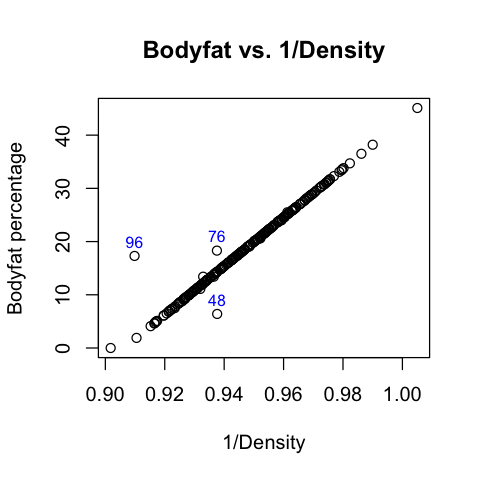

In [3]:
library(IRdisplay)
layout(1)

library(repr)
options(repr.plot.width=4, repr.plot.height=4)

# Plot bodyfat vs 1/density
x = plot( y = bodyfat_original$bodyfat, x = 1/bodyfat_original$density, ylab = "Bodyfat percentage",
      xlab = "1/Density", main = "Bodyfat vs. 1/Density")

# Add labels to points that deviate from straight line
text(1/bodyfat_original$density[48],9,"48",col = "blue",cex=0.8)
text(1/bodyfat_original$density[76],21,"76",col = "blue",cex=0.8)
text(1/bodyfat_original$density[96],20,"96",col = "blue",cex=0.8)

From the plot above, it is obvious that the majority of the points lie on the straight line except for observations 48, 76 and 96. 

In [4]:
# observations on plot that deviate from straight line
bodyfat_original[48,]
bodyfat_original[76,]
bodyfat_original[96,]

,bodyfat,density,age,weight,height,adiposity,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
48,6.4,1.0665,39,148.5,71.25,20.6,34.6,89.8,79.5,92.7,52.7,37.5,21.9,28.8,26.8,17.9


,bodyfat,density,age,weight,height,adiposity,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
76,18.3,1.0666,61,148.25,67.5,22.9,36,91.6,81.8,94.8,54.5,37,21.4,29.3,27,18.3


,bodyfat,density,age,weight,height,adiposity,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
96,17.3,1.0991,53,224.5,77.75,26.1,41.1,113.2,99.2,107.5,61.7,42.3,23.2,32.9,30.8,20.4


The above table shows the measurements for the three observations. As percentage of body fat can be determined from density using Siri's equation and vice versa, the percentage of body fat for these observations were calculated. The density for observations 48 and 76 are similar and the body fat recalculated is 14.1% (to the nearest tenth) while that for observation 96 is 0.4% which does not make sense considering the high value of other measurements. Thus, we replaced the percentage of body fat for observations 48 and 76 with 14.1% and re-calculated and corrected the density for observation 96 (which is 1.0953). After making these changes, all points lie on the straight line.

After correcting for the height value for observation 42 and body fat percentage for observation 48 and 76, removing density variable and remove observations 39, 182 and 216.

In [5]:
# correct the values, remove density variable and remove observations 39, 182 and 216
# Replace bodyfat for obs 48, 76 with Siri equation
bodyfat_original$bodyfat[76] =  round(495/bodyfat_original$density[76]-450,digits=1)
bodyfat_original$bodyfat[48] =  round(495/bodyfat_original$density[48]-450,digits=1)

# replace body density in bodyfat_dat for obs 96 with Siri equation
bodyfat_original$density[96] =  round(495/(450+bodyfat_original$bodyfat[96]),digits=4)

# remove density variable
bodyfat_original = bodyfat_original[,-2]

# replace height of observation 42 with 69.4
bodyfat_original$height[42] = 69.4
# remove observations 39, 182 and 216
bodyfat_cleaned = bodyfat_original[-c(39,182,216),]
rownames(bodyfat_cleaned) = NULL
summary(bodyfat_cleaned)

    bodyfat           age            weight          height     
 Min.   : 1.90   Min.   :22.00   Min.   :125.0   Min.   :64.00  
 1st Qu.:13.20   1st Qu.:35.00   1st Qu.:159.2   1st Qu.:68.50  
 Median :19.00   Median :43.00   Median :176.2   Median :70.00  
 Mean   :18.86   Mean   :44.88   Mean   :178.3   Mean   :70.33  
 3rd Qu.:24.50   3rd Qu.:54.00   3rd Qu.:196.8   3rd Qu.:72.25  
 Max.   :38.20   Max.   :81.00   Max.   :262.8   Max.   :77.75  
   adiposity          neck           chest          abdomen      
 Min.   :19.10   Min.   :31.10   Min.   : 83.4   Min.   : 70.40  
 1st Qu.:23.10   1st Qu.:36.40   1st Qu.: 94.4   1st Qu.: 84.60  
 Median :25.00   Median :38.00   Median : 99.6   Median : 90.90  
 Mean   :25.32   Mean   :37.94   Mean   :100.7   Mean   : 92.31  
 3rd Qu.:27.30   3rd Qu.:39.40   3rd Qu.:105.3   3rd Qu.: 99.20  
 Max.   :39.10   Max.   :43.90   Max.   :128.3   Max.   :126.20  
      hip             thigh            knee           ankle      
 Min.   : 85.30  

Looking at the summary, the minimum body fat is 1.90 which is abnormal for a healthy adult man. The re-calculated body fat value using the Siri's equation returned a lower value of 0.70. Thus, we decided to remove this observation from the data set. The final data set for analysis contains 248 observations and 15 variables.

In [6]:
# remove observation with bodyfat = 1.9
bodyfat_cleaned = bodyfat_cleaned[-171,]

# write csv
write.csv(bodyfat_cleaned, file="bodyfat_cleaned.csv",row.names = FALSE)

## Variable Selection

### A. Preliminary Analysis

We plotted body fat percentage against each predictor variable to examine the relationship between them and there seems to be a linear relationship between body fat percentage and all other variables except height and ankle. Several transformation techniques have been applied on the height and ankle variables but the linear relationship was not obvious. The pearson correlation coefficient between body fat percentage and each predictor is tabulated as follows:

In [7]:
# calculate pearson correlation coefficient between body fat percentage 
# and each predictor variable 

x = subset(bodyfat_cleaned, select = -bodyfat)
y = bodyfat_cleaned$bodyfat
correlation = cor(x, y, method = c("pearson"))
order = correlation[order(-abs(correlation[,1])),]
order

abdomen   adiposity       chest         hip      weight       thigh 
 0.81176316  0.72519117  0.68172929  0.61665675  0.60139826  0.54155160 
       knee      biceps        neck     forearm       wrist         age 
 0.50353517  0.46132656  0.45618344  0.34952768  0.31528733  0.28336289 
      ankle      height 
 0.23175961 -0.02051515

The absolute value of pearson correlation coefficients also showed that height and ankle are the lowest. 

A simple multiple linear regression model consisting of all predictors was then fitted in this project and Box-Cox transfomation on response variable was considered. The corresponding lambda value when log-likelohood is at the maximum is approximately 1, suggesting that no tranformation is needed on body fat percentage.

### B. Methods 

Several methods were used to select the best subset of predictors: forward, backward and stepwise selections using AIC and BIC criteria, best subset selection (based on both BIC and *R$^{2}_{adj}$*), Lasso regression as well as Mallow's Cp. 

In [8]:
# full model - multiple linear regression
full.model = lm(bodyfat~., data = bodyfat_cleaned)

# stepwise selection
model.bic.both = step(full.model, direction = "both", k = log(nrow(bodyfat_cleaned)), trace = FALSE)
model.aic.both = step(full.model, direction = "both", k = 2, trace = FALSE)

# backward selection
model.bic.backward = step(full.model, direction = "backward", k = log(nrow(bodyfat_cleaned)), trace = FALSE)
model.aic.backward= step(full.model, direction = "backward", k = 2, trace = FALSE)

# forward selection
model.bic.forward = step(full.model, direction = "forward", k = log(nrow(bodyfat_cleaned)), trace = FALSE)
model.aic.forward = step(full.model, direction = "forward", k = 2, trace = FALSE)

# best subset selection
library(leaps)
bestsubset = regsubsets(bodyfat~., data=bodyfat_cleaned, nvmax=ncol((bodyfat_cleaned)-1))
summary.bestsubset = summary(bestsubset)
model.bestsubset = lm(bodyfat~weight+abdomen+wrist, data=bodyfat_cleaned)

# fit lasso
library(glmnet)
x = model.matrix(bodyfat~., data = bodyfat_cleaned)[,-1]
y = bodyfat_cleaned$bodyfat
model.cv.lasso = cv.glmnet(x, y, family = "gaussian", alpha = 1, type.measure = "mse")

# Mallow's Cp criterion
library(faraway)
mallow_Cp = leaps(x,y,nbest = 1)
mallow_Cp = leaps(x,y,nbest = 1)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



The following table shows the subset of variables selected by each method. It is shown that the two variables abdomen and wrist are selected by all methods, suggesting that these variables are important in predicting body fat percentage.

| method | age | weight | height | adiposity | neck | chest |  abdomen | hip | thigh | knee | ankle | biceps| forearm | wrist |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
|stepwise (BIC) | | | <ul><li> | | | | <ul><li> | | | | | | | <ul><li> |
|stepwise (AIC) | <ul><li> | | <ul><li> | <ul><li> |<ul><li> | <ul><li> | <ul><li> | <ul><li> | | | | |<ul><li> |<ul><li> |
|backward (BIC) |<ul><li> | | | | | |<ul><li> | | | | | | |<ul><li>|
|backward (AIC) | <ul><li>| | |<ul><li> |<ul><li> | <ul><li>|<ul><li> |<ul><li> | | | | | <ul><li>|<ul><li> |
|forward (BIC)  | <ul><li>| <ul><li>|<ul><li> |<ul><li> |<ul><li> |<ul><li> |<ul><li> |<ul><li> |<ul><li> |<ul><li> |<ul><li> |<ul><li> |<ul><li> |<ul><li> |
|forward (AIC)  | <ul><li>| <ul><li>|<ul><li> |<ul><li> |<ul><li> |<ul><li> |<ul><li> |<ul><li> |<ul><li> |<ul><li> |<ul><li> |<ul><li> |<ul><li> |<ul><li> |
|best subset    | | <ul><li>| | | | | <ul><li>| | | | | | |<ul><li> |
|Lasso          | <ul><li>| |<ul><li> | | | | <ul><li>| | | | | | | <ul><li>|
|Mallow's Cp    | <ul><li>| | <ul><li>| | | <ul><li>| <ul><li>| | | | | <ul><li>| | <ul><li>|

## Statistical Analysis

### A. Best Model Fitting

Here are some models listed to compare $R^2$ and $MSE$ (mean of least square error). The listed models are either models with variable selection methods or models with small amount of features.

In [9]:
model0_1 = lm(bodyfat ~ abdomen , data = bodyfat_cleaned)
model1_0 = lm(bodyfat ~ abdomen + wrist, data = bodyfat_cleaned)
model1_1 = lm(bodyfat ~ weight + abdomen + wrist , data = bodyfat_cleaned)
model1_2 = lm(bodyfat ~ age + height + abdomen + wrist , data = bodyfat_cleaned)
model1_3 = lm(bodyfat ~ age + height + chest + abdomen + biceps + wrist , data = bodyfat_cleaned)
model1_4 = lm(bodyfat ~ weight + height + adiposity + abdomen + biceps + wrist , data = bodyfat_cleaned)

library('stringr')
modelout = function(model_in){
  colname = str_c(colnames(model_in$model),collapse = "+")
  colname = sub("bodyfat\\+","",colname)
  out = summary(model_in)
  R2 = round(out$adj.r.squared,4)
  MSE = round(out$sigma,4)
  output = c(colname,R2,MSE)
  return(output)
}

input0_1 = modelout(model0_1)
input1_0 = modelout(model1_0)
input1_1 = modelout(model1_1)
input1_2 = modelout(model1_2)
input1_3 = modelout(model1_3)
input1_4 = modelout(model1_4)
model_data = data.frame(rbind(input0_1, input1_0, input1_1, input1_2, input1_3, input1_4 ))
colnames(model_data) = c("features","Adj R2","MSE")
rownames(model_data) = c('model0_1', 'model1_0', 'model1_1', 'model1_2', 'model1_3', 'model1_4')
model_data


,features,Adj R2,MSE
model0_1,abdomen,0.6576,4.3123
model1_0,abdomen+wrist,0.699,4.0433
model1_1,weight+abdomen+wrist,0.715,3.9342
model1_2,age+height+abdomen+wrist,0.7178,3.9145
model1_3,age+height+chest+abdomen+biceps+wrist,0.7206,3.8952
model1_4,weight+height+adiposity+abdomen+biceps+wrist,0.716,3.9273


We decide to choose the model with two features: abdomen and wrist. There are mainly three reasons.
1. The results of different variable selection methods above all include abdomen and wrist variables.
2. We find that measurement of Adjusted $R^2$ and $MSE$ do not imporve too much after adding more variables. For example, the model with the biggest imporvement is model1_3, which reduce $MSE$ for about 4% but it includes four more variables, which increase the model complexity a lot.
3. The model with only two variables has small model complexity and it is easy to interpret each variable.

### B. Model Diagnostics

Our final model is $Bodyfat = \beta_0 + \beta_1 \cdot abdomen + \beta_2 \cdot wrist$. <br>
We generally check the model based on three parts: the influential points, the assumption on normality and the assumption on residuals.

#### 1. Checking for Influential Points

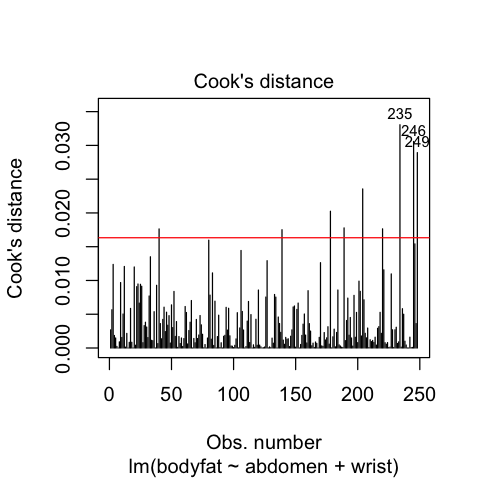

In [10]:
cutoff = 4/(nrow(bodyfat_cleaned) - length(model1_0$coefficients-2))
plot(model1_0,which = 4, cook.levels = cutoff )
abline(cutoff,0,col = "red")

In [11]:
index = which(cooks.distance(model1_0)>cutoff)
bodyfat_cleaned[index,]

,bodyfat,age,weight,height,adiposity,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
40,33.1,45,262.75,68.75,39.1,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4
139,20.1,49,212.75,75.00,26.6,40.8,104.7,106.6,107.7,66.5,42.5,24.5,35.5,29.8,18.7
179,16.8,39,234.75,74.50,29.8,42.8,109.5,104.5,109.9,69.5,43.1,25.8,39.1,32.5,19.9
190,36.5,42,244.25,76.00,29.8,41.8,115.2,113.7,112.4,68.5,45.0,25.5,37.1,31.2,19.9
205,31.7,44,166.00,65.50,27.2,39.1,100.6,93.9,100.1,58.9,37.6,21.4,33.1,29.5,17.3
221,6.1,55,142.25,67.25,22.2,35.2,92.7,82.8,91.9,54.4,35.2,22.5,29.4,26.8,17.0
235,26.4,63,219.15,69.50,31.9,40.2,117.6,113.8,111.8,63.4,41.1,22.3,35.1,29.6,18.5
246,32.3,72,201.00,69.75,29.1,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,30.7,74,207.50,70.00,29.8,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9


We find that there are 9 points which Cook's Distance is greater than the threshold value. The measurements for these observations look normal and therefore we decided to retain all the observations in our model.

#### 2. Checking for Normality

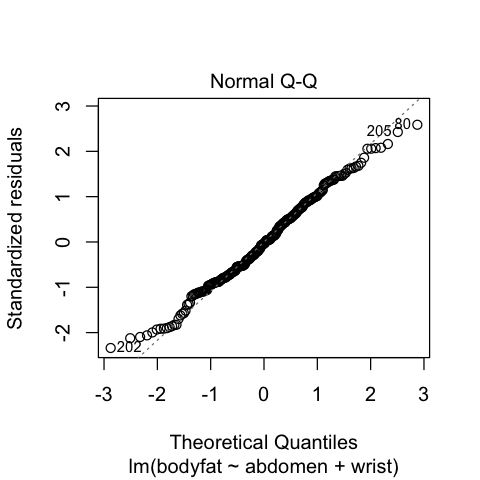

In [12]:
plot(model1_0,which = 2)

According to the QQ-plot, all points are close to the dashed diagnoal line, so we believe that the residuals follow the normally distribution.

#### 3. Checking for Residuals

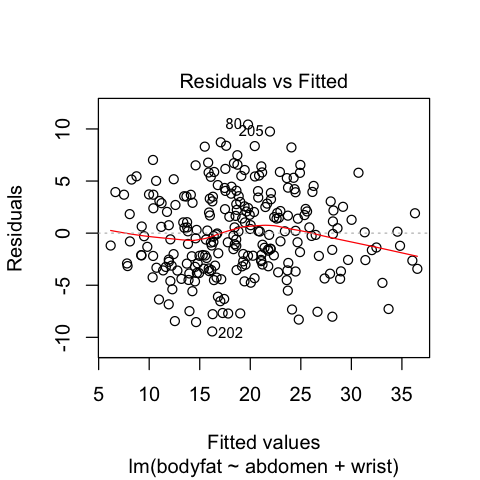

In [13]:
plot(model1_0,which = 1)

The model tends to have a higher variance when fitted values range from 15 to 25. Also, the mean of the resiaduals become smaller when fitted value is in the range of 30 to 35. So we believe that our model does not satisfy $E(\varepsilon) = 0$ and $Var(\varepsilon) =$ constant $\sigma^2$ perfectly.

### C. Hypothesis Testing

We generally do the following 2 hypothesis testing:
1. t-testing on coefficients $H_0: \beta_i = 0$ v.s. $H_1: \beta_i \neq 0$
2. F-testing on the full model we choose $H_0 = \beta_1 = \beta_2 = 0$ v.s. $H_1: H_0$ not true

In [14]:
summary(model1_0)


Call:
lm(formula = bodyfat ~ abdomen + wrist, data = bodyfat_cleaned)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.4347 -2.9466 -0.1478  2.9312 10.4217 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -9.26943    5.23360  -1.771   0.0778 .  
abdomen      0.71469    0.03216  22.225  < 2e-16 ***
wrist       -2.07472    0.35157  -5.901 1.19e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.043 on 245 degrees of freedom
Multiple R-squared:  0.7014,	Adjusted R-squared:  0.699 
F-statistic: 287.8 on 2 and 245 DF,  p-value: < 2.2e-16


Based on F-testing, our model has a siginficant effect for all variables.<br>
Based on t-testing, all of our variables are significant according to p-values and standard errors for each variable is small, with a significant level less that 0.05. The abdomen variable has a positive effect on bodyfat while the wrist variable has a negative effect on bodyfat. <br>



## Interpretation

In [15]:
model1_0$coefficients
confint(model1_0)
# Plot Confidence interval on y

(Intercept)     abdomen       wrist 
 -9.2694255   0.7146912  -2.0747231

,2.5 %,97.5 %
(Intercept),-19.578025,1.0391741
abdomen,0.651351,0.7780314
wrist,-2.767210,-1.3822366


A "unit" increase in abdomen is associated with a 0.715 "unit" increase in body fat.<br>
A "unit" increase in wrist is associated with 2.075 "unit" decrease in body fat.<br>

The body fat is positvely related to abdomen, which means the higher abdomen is, the higher body fat a man tends to have.<br>
We find that there is a negative relationship between wrist and body fat, which contradicts our common sense. Based on our common knowledge, a man with higher wrist may be fatter, which leads to a higher body fat. <br>
Based on the density formula $density = \frac{Mass}{Volume}$, an object with higher volume will have a lower density. So we believe that the negative relation is due to a higher body size (Volume), which can be implied by larger wrist.<br>

## Layman's expression


In [16]:
newdata = data.frame('abdomen' = 90, 'wrist' = 18)
predict.lm(model1_0,newdata,interval = 'confidence',level = 0.95)

fit,lwr,upr
17.70777,17.18315,18.23239


A man's body fat comes from 0.7 times abdomen, minus 2 times wrist, minus 10.<br>
For example, suppose that a male whose abdomen is 90 cm and whose wrist is 18 cm, then his body fat is about 17.71%.<br> 
There is a 95% probability that his body fat is between 17.18% and 18.23%.

## Strengths and Weaknesses

Strengths:
1. The linear model only includes two variables, which is easy to expalain and has small model complexity.
2. All variables(abdomen and wrist) can be easily measured.
3. The model is a good fitted model, with 70.14% adjusted $R^2$ and 4.06 Mean Square Error.
4. The linear model satisfy the normality assumption.
5. The confidence intervals on the coefficient of abroden and wrist are relatively small.

Weaknesses:
1. The model may violate the some assumptions, including the residual-mean-zero assumption and residual-constant-variance assumption.
2. The confidence interval on the coefficient of intercept is relatively big.
3. The model haven't consider higher order variables or interactions of different variables.

## Conclusion

Overall, our model gives a simple way to predict body fat percentage which is easy to understand and accurate. However, the model may still have some problem, for examples some linear model assumptions on error terms are violated.

## Duties

1. Bi Qing Teng: Analysing raw data, data cleaning and variable selection
2. Xiaoxiang Hua: Variable selection, Model Diagnostics, Model interpretation and Model strength and weaknesses
3. Yijie Liu: Write the Shiny app code, and make the slides, and jupyter notebook summary.

## Reference

[1] Body fat calculators:  

https://bmi-calories.com/body-fat-percentage-calculator.html  
http://www.bmi-calculator.net/body-fat-calculator/

[2] Bailey, Covert (1994). _Smart Exercise: Burning Fat, Getting Fit_, Houghton-Mifflin Co., Boston, pp. 179-186.  

[3] Behnke, A.R. and Wilmore, J.H. (1974). _Evaluation and Regulation of Body Build and Composition_, Prentice-Hall, Englewood Cliffs, N.J.  

[4] Siri, W.E. (1956), "Gross composition of the body", in _Advances in  Biological and Medical Physics_, vol. IV, edited by J.H. Lawrence and C.A. Tobias, Academic Press, Inc., New York.  

[5] Katch, Frank and McArdle, William (1977). _Nutrition, Weight Control, and Exercise_, Houghton Mifflin Co., Boston.  

[6] Wilmore, Jack (1976). _Athletic Training and Physical Fitness: Physiological Principles of the Conditioning Process_, Allyn and Bacon, Inc., Boston.
